In [2]:
from fears.population import Population
from fears.utils import plotter
import matplotlib.pyplot as plt
import numpy as np

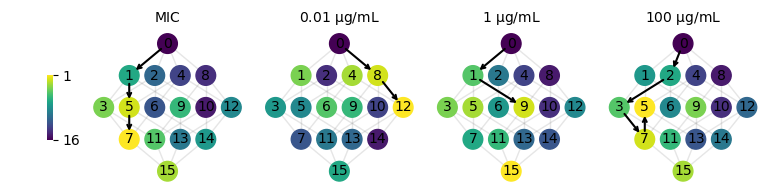

In [3]:
p = Population(fitness_data='from_file')

fig,ax_list = plt.subplots(ncols=4,figsize=(8.5,5))

arrowprops = dict(arrowstyle='->', color='black', lw=1.5,mutation_scale=7,shrinkA=6,shrinkB=6)

gen_list = [0]
indx =0
isMaximum = False

landscape_options = {'node_size':200,
                    'square':True,'node_label':'base10','arrowprops':arrowprops,
                    'resize_param':0.01,'edge_alpha':0.1,'textsize':10}

while not isMaximum:
    neighbors = p.gen_neighbors(gen_list[indx])
    fitness = p.ic50
    fitness_neighbors = [fitness[i] for i in neighbors]
    cur_fitness = fitness[gen_list[indx]]

    if max(fitness_neighbors) > cur_fitness:
        gen_list.append(neighbors[fitness_neighbors.index(max(fitness_neighbors))])
        indx += 1
    else:
        isMaximum = True

ax = ax_list[0]

plotter.plot_landscape(p,trajectory_list=[gen_list],ax=ax,fit_land=p.ic50,colorbar=True,
                       cbloc = [-0.6,0.25,0.3,0.5],cblabel='',**landscape_options)

ax.set_title('MIC',pad=10,fontsize=10)

for i,conc in enumerate([10**-2,1,10**2]):

    ax = ax_list[i+1]

    gen_list = [0]
    indx = 0
    isMaximum = False

    while not isMaximum:
        neighbors = p.gen_neighbors(gen_list[indx])
        fitness = p.gen_fit_land(conc=conc)
        fitness_neighbors = [fitness[i] for i in neighbors]
        cur_fitness = fitness[gen_list[indx]]

        if max(fitness_neighbors) > cur_fitness:
            gen_list.append(neighbors[fitness_neighbors.index(max(fitness_neighbors))])
            indx += 1
        else:
            isMaximum = True

    plotter.plot_landscape(p,conc=conc,trajectory_list=[gen_list],colorbar=False,ax=ax,
                           **landscape_options)
    
    ax.set_title(str(conc) + ' $\mathrm{\mu}$g/mL',pad=10,fontsize=10)

fig.savefig('../figures/trajectory_analysis.pdf',bbox_inches='tight')

In [51]:
def moran_fix_prob(fi,fj,N):
    if fj <= 0:
        p_ij = 0
    else:
        if fi < 0:
            fi = 0
        p_ij = (1-(fi/fj)**2)/(1-(fi/fj)**(2*N))
    return p_ij

/var/folders/pz/780f5rtx09xg5tblgt0ngytwvwx01r/T/ipykernel_5472/2799721181.py:7: RuntimeWarning: overflow encountered in scalar power
  p_ij = (1-(fi/fj)**2)/(1-(fi/fj)**(2*N))


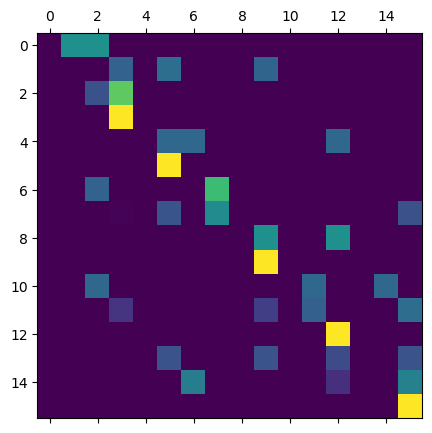

In [32]:
conc = 10

P = np.zeros((16,16))

fit_land = p.gen_fit_land(conc=conc)

fit_land = fit_land/np.max(fit_land)

for i in range(16):
    for j in range(16):

        if i!=j:
            
            neighbors = p.gen_neighbors(i)

            if j in neighbors:
                f_i = fit_land[i]
                f_j = fit_land[j]

                P[i,j] = moran_fix_prob(f_i,f_j,10**9)
            
            else:
                P[i,j] = 0


for i in range(16):
    neighbors = p.gen_neighbors(i)
    P[i,i] = 1 - sum(P[i,j] for j in neighbors)

fig,ax = plt.subplots(figsize=(5,5))

P[np.where(P<0)] = 0

# normalize each row

for i in range(16):
    P[i] = P[i]/np.sum(P[i])

ax.matshow(P,cmap='viridis')


/var/folders/pz/780f5rtx09xg5tblgt0ngytwvwx01r/T/ipykernel_5472/1340513633.py:7: RuntimeWarning: overflow encountered in scalar power
  p_ij = (1-(fi/fj)**2)/(1-(fi/fj)**(2*N))


[ 0.          1.          0.          0.          0.29739869  0.
  0.         -0.30816274  0.34271042  0.          0.          0.32853004
  0.         -0.19392084  0.20985088  0.20974698]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.88380654]
[0.         0.         0.         0.         0.         0.
 0.45973066 0.32043955 0.         0.         0.72149421 0.22760038
 0.         0.17771732 0.09797864 0.30524458]
[0.         1.         0.         0.31121916 0.         0.
 0.24308525 0.01194144 0.         0.27560949 0.10154956 0.00563582
 0.22466523 0.07312481 0.26023231 0.23187351]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.87193446]
[0.         0.         0.         0.         0.         0.
 0.73680055 0.         0.         0.         0.         0.19261901
 0.         0.

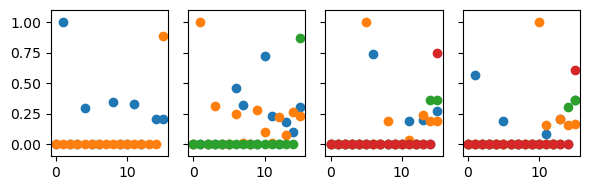

In [84]:
from numpy import linalg as LA

p = Population(fitness_data='from_file',death_model=None)

fig,ax_list = plt.subplots(ncols=4,figsize=(6,2),sharey=True,sharex=True)

for cindx,conc in enumerate([0,10**-2,1,10**2]):

    P = np.zeros((16,16))

    fit_land = p.gen_fit_land(conc=conc)

    fit_land = fit_land/np.max(fit_land)

    fit_land[fit_land<0] = 0

    for i in range(16):
        for j in range(16):

            if i!=j:
                
                neighbors = p.gen_neighbors(i)

                if j in neighbors:
                    f_i = fit_land[i]
                    f_j = fit_land[j]

                    P[i,j] = moran_fix_prob(f_i,f_j,10**9)
                
                else:
                    P[i,j] = 0


    for i in range(16):
        if fit_land[i] <= 0:
            P[i,i] = 0
        else:
            neighbors = p.gen_neighbors(i)
            P[i,i] = 1 - sum(P[i,j] for j in neighbors)

    P[np.where(P<0)] = 0

    for i in range(16):
        if np.sum(P[i]) > 0:
            P[i] = P[i]/np.sum(P[i])

    # compute eigenvalues and eigenvectors of P

    w, v = LA.eig(P)

    ax = ax_list[cindx]

    # print eigenvectors corresponding to eigenvalues = 1
    x = np.arange(16)

    for j in range(16):
        if w[j] == 1:
            ax.scatter(x,v[j].real)

    ax.set_ylim(-0.1,1.1)
    # ax.set_yscale('log') 

fig.tight_layout()


In [158]:
def compute_pmat(conc=None,fit_land=None):
    
        P = np.zeros((16,16))

        if fit_land is None:
            fit_land = p.gen_fit_land(conc=conc)
    
        fit_land = fit_land/np.max(fit_land)
    
        fit_land[fit_land<0] = 0
    
        for i in range(16):
            for j in range(16):
    
                if i!=j:
                    
                    neighbors = p.gen_neighbors(i)
    
                    if j in neighbors:
                        f_i = fit_land[i]
                        f_j = fit_land[j]
    
                        P[i,j] = moran_fix_prob(f_i,f_j,10**9)
                    
                    else:
                        P[i,j] = 0
    
    
        for i in range(16):
            if fit_land[i] <= 0:
                P[i,i] = 0
            else:
                neighbors = p.gen_neighbors(i)
                P[i,i] = 1 - sum(P[i,j] for j in neighbors)
    
        P[np.where(P<0)] = 0
    
        for i in range(16):
            if np.sum(P[i]) > 0:
                P[i] = P[i]/np.sum(P[i])
    
        return P

In [92]:
fit_land = p.gen_fit_land(conc=0)

P = np.zeros((16,16))

for i in range(16):
        for j in range(16):

            if i!=j:
                
                neighbors = p.gen_neighbors(i)

                if j in neighbors:
                    f_i = fit_land[i]
                    f_j = fit_land[j]

                    P[i,j] = moran_fix_prob(f_i,f_j,10**9)
                
                else:
                    P[i,j] = 0


for i in range(16):
    if fit_land[i] <= 0:
        P[i,i] = 0
    else:
        neighbors = p.gen_neighbors(i)
        P[i,i] = 1 - sum(P[i,j] for j in neighbors)

P[np.where(P<0)] = 0

for i in range(16):
    if np.sum(P[i]) > 0:
        P[i] = P[i]/np.sum(P[i])

w, v = LA.eig(P)

print(v[15])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.88380654]


/var/folders/pz/780f5rtx09xg5tblgt0ngytwvwx01r/T/ipykernel_5472/1340513633.py:7: RuntimeWarning: overflow encountered in scalar power
  p_ij = (1-(fi/fj)**2)/(1-(fi/fj)**(2*N))


/var/folders/pz/780f5rtx09xg5tblgt0ngytwvwx01r/T/ipykernel_5472/1340513633.py:7: RuntimeWarning: overflow encountered in scalar power
  p_ij = (1-(fi/fj)**2)/(1-(fi/fj)**(2*N))


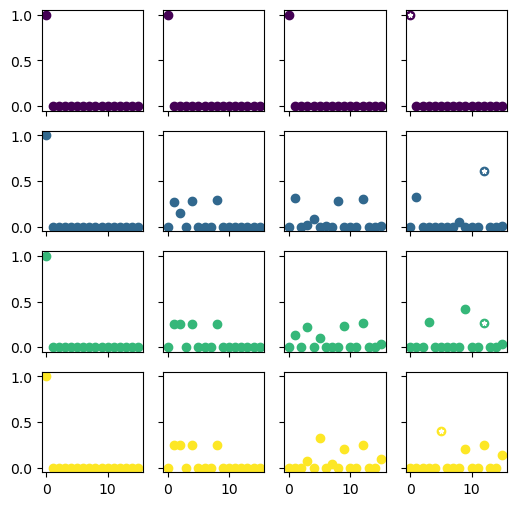

In [149]:
fig,ax_list = plt.subplots(ncols=4,nrows=4,figsize=(6,6),sharey=True,sharex=True)

x0 = np.zeros(16)
x0[0] = 1

x = np.arange(16)

cmap = plt.get_cmap('viridis')

for cindx,conc in enumerate([0,10**-2,1,10**2]):

    P = compute_pmat(conc)

    # print(np.matmul(x0.T,P))

    for tindx,t in enumerate([0,1,10,100]):
        xt = np.matmul(x0.T,np.linalg.matrix_power(P,t))
        ax = ax_list[cindx,tindx]
        ax.scatter(x,xt,color=cmap(cindx/3))

    ax = ax_list[cindx,-1]
    fl = p.gen_fit_land(conc=conc)
    fl = fl/np.max(fl)
    max_indx = np.argmax(fl)
    ax.scatter(x[max_indx],xt[max_indx],s=10,marker='*',color='white')

/var/folders/pz/780f5rtx09xg5tblgt0ngytwvwx01r/T/ipykernel_5472/1340513633.py:7: RuntimeWarning: overflow encountered in scalar power
  p_ij = (1-(fi/fj)**2)/(1-(fi/fj)**(2*N))


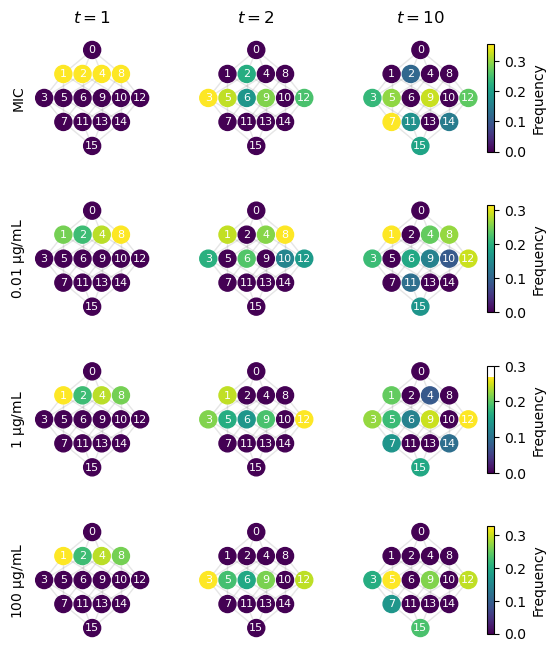

In [184]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

fig,ax_list = plt.subplots(ncols=3,nrows=4,figsize=(6,8),sharey=True,sharex=True)

landscape_options = {'node_size':150,
                    'square':True,'node_label':'base10','arrowprops':arrowprops,
                    'resize_param':0.01,'edge_alpha':0.1,'textsize':8,'textcolor':'white'}

x0 = np.zeros(16)
x0[0] = 1

x = np.arange(16)

fit_land = p.ic50 - np.min(p.ic50)

P = compute_pmat(fit_land=fit_land)

for tindx,t in enumerate([1,2,10]):
    xt = np.matmul(x0.T,np.linalg.matrix_power(P,t))

    xt_norm = xt/np.max(xt)
    
    ax = ax_list[0,tindx]
    ax = plotter.plot_landscape(p,conc=conc,fit_land=xt_norm,ax=ax,**landscape_options,colorbar=False)
    if tindx ==2:
        cbax = ax.inset_axes([1,0.1,0.05,0.8])
        norm = Normalize(vmin=np.min(xt),vmax=np.max(xt))
        cb = plt.colorbar(ScalarMappable(norm=norm,cmap='viridis'),cax=cbax,
                            orientation='vertical')
        cb.set_label('Frequency',fontsize=10)
        cb.set_ticks([0,0.1,0.2,0.3])


for cindx,conc in enumerate([10**-2,1,10**2]):

    P = compute_pmat(conc)

    # print(np.matmul(x0.T,P))

    for tindx,t in enumerate([1,2,10]):
        xt = np.matmul(x0.T,np.linalg.matrix_power(P,t))

        xt_norm = xt/np.max(xt)
        
        ax = ax_list[cindx+1,tindx]

        ax = plotter.plot_landscape(p,conc=conc,fit_land=xt_norm,ax=ax,**landscape_options,colorbar=False)

        if tindx ==2:
            cbax = ax.inset_axes([1,0.1,0.05,0.8])
            norm = Normalize(vmin=np.min(xt),vmax=np.max(xt))
            cb = plt.colorbar(ScalarMappable(norm=norm,cmap='viridis'),cax=cbax,
                              orientation='vertical')
            cb.set_label('Frequency',fontsize=10)
            cb.set_ticks([0,0.1,0.2,0.3])

ax_list[0,0].set_title('$t = 1$')
ax_list[0,1].set_title('$t = 2$')
ax_list[0,2].set_title('$t = 10$')

ax_list[0,0].annotate('MIC',xy=(-0.05,0.5),xycoords='axes fraction',fontsize=10,ha='center',va='center',rotation=90)
ax_list[1,0].annotate('0.01 $\mathrm{\mu}$g/mL',xy=(-0.05,0.5),xycoords='axes fraction',fontsize=10,ha='center',va='center',rotation=90)
ax_list[2,0].annotate('1 $\mathrm{\mu}$g/mL',xy=(-0.05,0.5),xycoords='axes fraction',fontsize=10,ha='center',va='center',rotation=90)
ax_list[3,0].annotate('100 $\mathrm{\mu}$g/mL',xy=(-0.05,0.5),xycoords='axes fraction',fontsize=10,ha='center',va='center',rotation=90)

fig.savefig('../figures/transition_matrix_analysis.pdf',bbox_inches='tight')
